In [71]:
# import wget
#
# url = 'http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz'
# myfile = wget.download(url)

In [72]:
# import tarfile
# file = tarfile.open('food-101.tar.gz')
# file.extractall('./food-101')

In [73]:
# Get labels
import json
import os

import keras.layers.activation
from tqdm.notebook import tqdm

def get_labels(label_path):
    """
    Accepts a label path (in the form of a JSON) and returns the file
    as a Python object.
    """
    with open(label_path) as f:
        return json.load(f)

train_labels = get_labels("C:/Users/vivek/Downloads/food-101/food-101/meta/train.json")
test_labels = get_labels("C:/Users/vivek/Downloads/food-101/food-101/meta/test.json")

In [74]:
# Should be 750 for training set and 250 for test set
print(len(train_labels["churros"]))
print(len(test_labels["churros"]))

750
250


In [75]:
import pathlib
import numpy as np
import tensorflow as tf
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [76]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
    targe_folder = target_dir+target_class
    random_image = random.sample(os.listdir(targe_folder),1)
    img = mpimg.imread(targe_folder+"/"+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")
    return img

Image shape: (512, 512, 3)


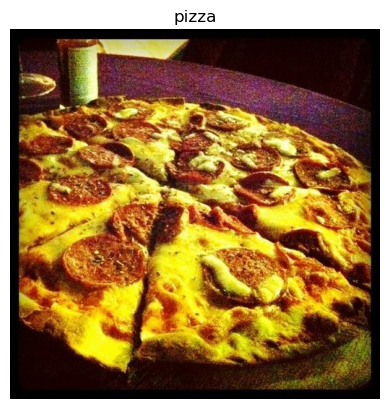

In [77]:
img = view_random_image(target_class="pizza",target_dir="pizza_steak/train/")

In [78]:

tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>

In [79]:
img.shape

(512, 512, 3)

In [80]:
#Normalizing data
img/255.

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [81]:
from keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
train_datagen=ImageDataGenerator(rescale=1./255.)
valid_datagen=ImageDataGenerator(rescale=1./255.)

#setup path to data dir
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)
valid_data = train_datagen.flow_from_directory(directory=test_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [82]:
#Build a CNN model
model_1 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
                                      tf.keras.layers.Conv2D(10,3,activation="relu"),
                                      tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
                                      tf.keras.layers.Conv2D(10,3,activation="relu"),
                                      tf.keras.layers.Conv2D(10,3,activation="relu"),
                                      tf.keras.layers.MaxPool2D(2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1,activation="sigmoid"),])
#compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_1 = model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6059 - accuracy: 0.6853 - val_loss: 0.4762 - val_accuracy: 0.7840
Epoch 2/5
47/47 [==============================] - 6s 137ms/step - loss: 0.4770 - accuracy: 0.7833 - val_loss: 0.3909 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 7s 153ms/step - loss: 0.4384 - accuracy: 0.8113 - val_loss: 0.3813 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 7s 150ms/step - loss: 0.3993 - accuracy: 0.8260 - val_loss: 0.3500 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 7s 153ms/step - loss: 0.3721 - accuracy: 0.8407 - val_loss: 0.3423 - val_accuracy: 0.8540


In [83]:
model_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_20 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_22 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [84]:
#009 Trying a non-CNN model on our image data
#trying to fit image data in non-cnn model
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),]
)
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_2 = model_2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 150ms/step - loss: 0.7646 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 7s 146ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 7s 140ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 129ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 7s 148ms/step - loss: 0.6932 - accuracy: 0.4853 - val_loss: 0.6931 - val_accuracy: 0.5000


In [85]:
#010 Improving our non-CNN model by adding more layers

tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"), ]
)
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_3 = model_3.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 132ms/step - loss: 2.6836 - accuracy: 0.6247 - val_loss: 1.6395 - val_accuracy: 0.6020
Epoch 2/5
47/47 [==============================] - 7s 142ms/step - loss: 1.0587 - accuracy: 0.7113 - val_loss: 0.7440 - val_accuracy: 0.6340
Epoch 3/5
47/47 [==============================] - 7s 148ms/step - loss: 0.7796 - accuracy: 0.7120 - val_loss: 0.5644 - val_accuracy: 0.6960
Epoch 4/5
47/47 [==============================] - 7s 146ms/step - loss: 0.4636 - accuracy: 0.7907 - val_loss: 0.7009 - val_accuracy: 0.7060
Epoch 5/5
47/47 [==============================] - 7s 139ms/step - loss: 0.6666 - accuracy: 0.7227 - val_loss: 0.6005 - val_accuracy: 0.7680


Image shape: (384, 512, 3)


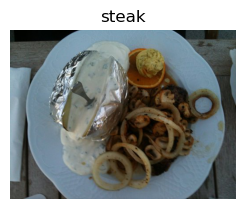

In [86]:
#011 Breaking our CNN model down part 1 Becoming one with the data
# biany classification breakdown
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")



In [87]:
#012 Breaking our CNN model down part 2 Preparing to load our data
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [88]:
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=(244,244),
                                             class_mode="binary",
                                             batch_size=32)
#013 Breaking our CNN model down part 3 Loading our data with ImageDataGenerator
test_data=test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(244,244),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [89]:
images,labels = train_data.next()
len(images),len(labels)

(32, 32)

In [90]:
#Get the images
images[:2],images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [91]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

In [92]:
#014 Breaking our CNN model down part 4 Building a baseline CNN model
# create a CNN model (Baseline model)
from keras.optimizers import Adam
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation,Dropout
from keras import Sequential

# create the baseline model
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=(3,3),
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(244,244,3)),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid")
])



In [93]:
len(train_data),len(test_data)

(47, 16)

In [94]:
#015 Breaking our CNN model down part 5 Looking inside a Conv2D layer
#016 Breaking our CNN model down part 6 Compiling and fitting our baseline CNN
#Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics = ["accuracy"])

#Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 8s 155ms/step - loss: 1.4973 - accuracy: 0.6467 - val_loss: 0.4520 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 7s 156ms/step - loss: 0.4518 - accuracy: 0.8013 - val_loss: 0.4774 - val_accuracy: 0.7720
Epoch 3/5
47/47 [==============================] - 8s 158ms/step - loss: 0.3642 - accuracy: 0.8600 - val_loss: 0.3936 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 8s 159ms/step - loss: 0.1932 - accuracy: 0.9373 - val_loss: 0.5341 - val_accuracy: 0.7440
Epoch 5/5
47/47 [==============================] - 8s 159ms/step - loss: 0.0734 - accuracy: 0.9887 - val_loss: 0.6944 - val_accuracy: 0.7420


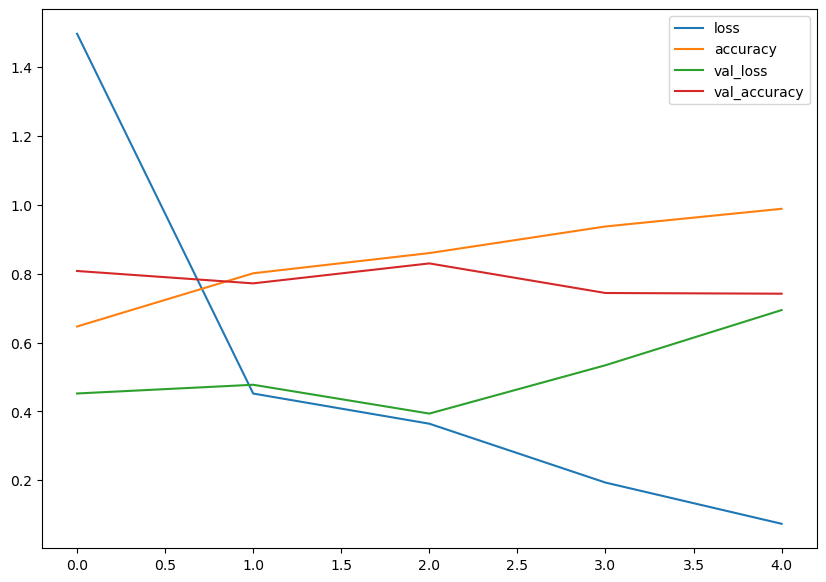

In [95]:
#017 Breaking our CNN model down part 7 Evaluating our CNN's training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [96]:
def plot_loss_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.plot(epochs,loss,label="training_loss")
    plt.plot(epochs,val_loss,label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    #plot  accuracy
    plt.figure()
    plt.plot(epochs,accuracy,label="training_accuracy")
    plt.plot(epochs,val_accuracy,label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()


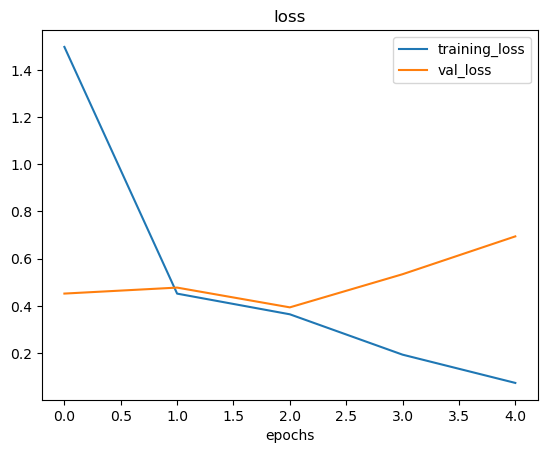

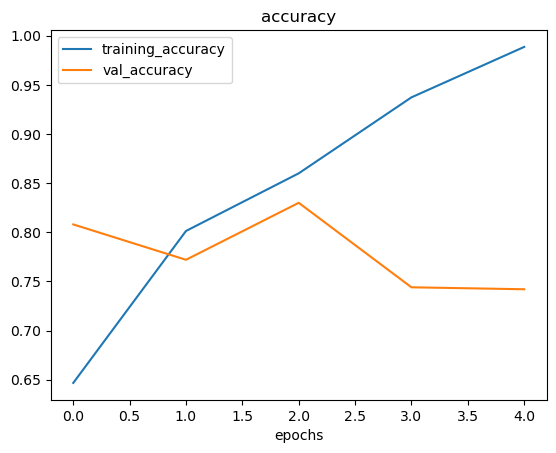

In [97]:
plot_loss_curves(history_4)

In [98]:
#018 Breaking our CNN model down part 8 Reducing overfitting with Max Pooling
# ideally the above loss curves should be very similar to each other
# adjust the model Parameters
model_5 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(244,244,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Dropout(0.3),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation=tf.keras.activations.sigmoid)
])



In [99]:
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=Adam(),
                metrics=['accuracy'])

In [100]:
history_5 = model_5.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 147ms/step - loss: 0.6412 - accuracy: 0.6120 - val_loss: 0.5081 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 8s 163ms/step - loss: 0.4566 - accuracy: 0.7860 - val_loss: 0.4017 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 7s 152ms/step - loss: 0.4145 - accuracy: 0.8200 - val_loss: 0.3704 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 7s 155ms/step - loss: 0.3990 - accuracy: 0.8240 - val_loss: 0.3613 - val_accuracy: 0.8820
Epoch 5/5
47/47 [==============================] - 7s 142ms/step - loss: 0.3807 - accuracy: 0.8340 - val_loss: 0.3375 - val_accuracy: 0.8960


In [101]:
model_5.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 242, 242, 10)      280       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 121, 121, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 119, 119, 10)      910       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 59, 59, 10)       0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 59, 59, 10)        0         
                                                                 
 conv2d_28 (Conv2D)          (None, 57, 57, 10)      

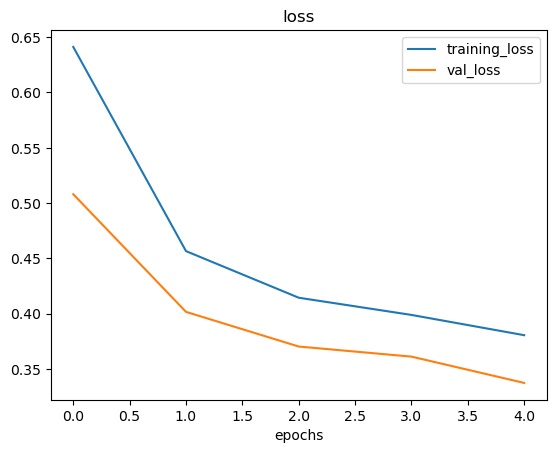

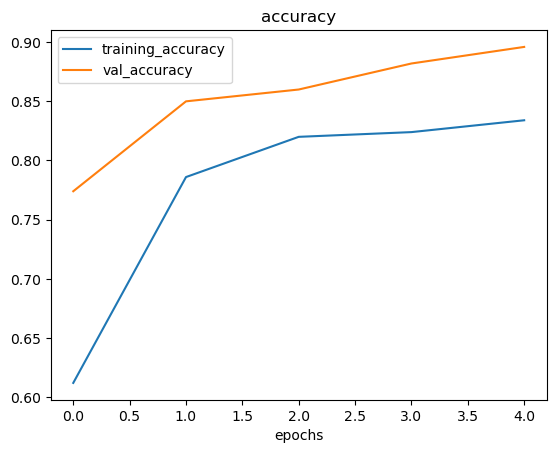

In [102]:
plot_loss_curves(history_5)

In [103]:
#019 Breaking our CNN model down part 9 Reducing overfitting with data augmentation
train_data_augmented = ImageDataGenerator(rescale=1/255.,
                                          rotation_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          width_shift_range=0.2,
                                          height_shift_range=0.3,
                                          horizontal_flip=True,)
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [104]:
#020 Breaking our CNN model down part 10 Visualizing our augmented data
train_data_augmented = train_data_augmented.flow_from_directory(train_dir,
                                                                target_size=(244,244),
                                                                batch_size=32,
                                                                class_mode="binary",
                                                                shuffle=True)

train_data= train_datagen.flow_from_directory(train_dir,
                                                                target_size=(244,244),
                                                                batch_size=32,
                                                                class_mode="binary",
                                                                shuffle=True)
test_data= test_datagen.flow_from_directory(test_dir,
                                                                target_size=(244,244),
                                                                batch_size=32,
                                                                class_mode="binary",
                                                                shuffle=True)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [105]:
images,labels = test_data.next()
augmentd_images,augmented_labels = train_data_augmented.next()

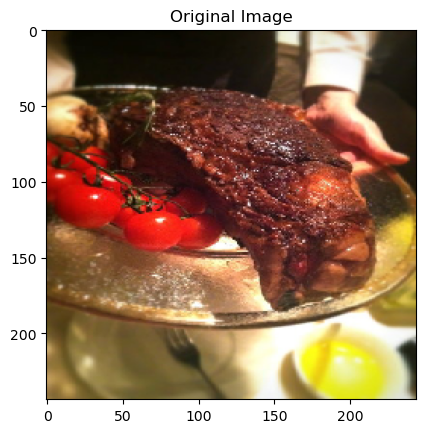

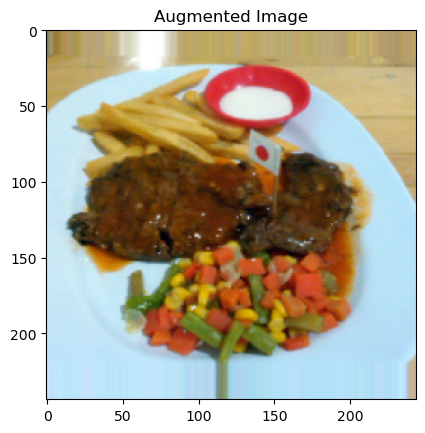

In [106]:
random_number = random.randint(0,31)
plt.imshow(images[random_number])
plt.title("Original Image")
plt.show()
plt.imshow(augmentd_images[random_number])
plt.title("Augmented Image")
plt.show()

In [107]:
#021 Breaking our CNN model down part 11 Training a CNN model on augmented data
model_6 = Sequential([
    Conv2D(10,3,activation=tf.keras.activations.relu),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation=tf.keras.activations.relu),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation=tf.keras.activations.relu),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation=tf.keras.activations.sigmoid)
])

model_6.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history_6=model_6.fit(train_data_augmented,epochs=5,steps_per_epoch=len(train_data_augmented),validation_data=test_data,validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 21s 439ms/step - loss: 0.6245 - accuracy: 0.6453 - val_loss: 0.4284 - val_accuracy: 0.8000
Epoch 2/5
47/47 [==============================] - 20s 417ms/step - loss: 0.5043 - accuracy: 0.7687 - val_loss: 0.3978 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 19s 410ms/step - loss: 0.4951 - accuracy: 0.7607 - val_loss: 0.3381 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 19s 395ms/step - loss: 0.4601 - accuracy: 0.7927 - val_loss: 0.3684 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 18s 377ms/step - loss: 0.4699 - accuracy: 0.7860 - val_loss: 0.4669 - val_accuracy: 0.7920


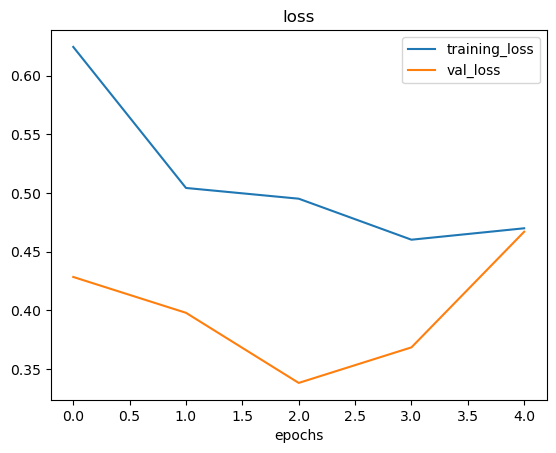

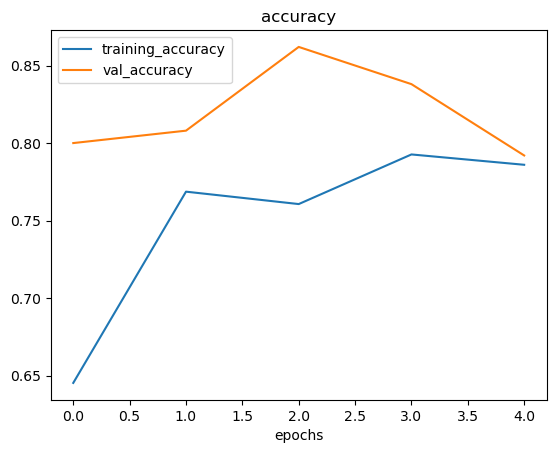

In [108]:
plot_loss_curves(history_6)

In [109]:
#022 Breaking our CNN model down part 12 Discovering the power of shuffling data
#Train a model with Shuffle = True

In [110]:
#023 Breaking our CNN model down part 13 Exploring options to improve our model
#024 Downloading a custom image to make predictions on
print(class_names)

['pizza' 'steak']


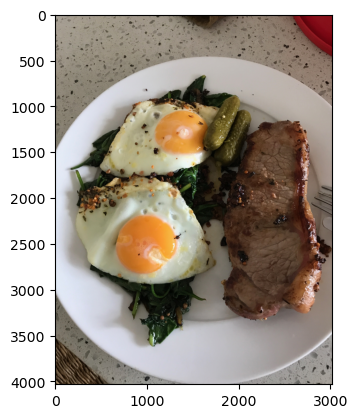

In [111]:
import matplotlib.image as mpimg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)

In [112]:
steak.shape

(4032, 3024, 3)

In [113]:
def load_and_prep_image(filename,img_shape=244):
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img)
    img = tf.image.resize(img,size=[img_shape,img_shape])
    img = img/255
    return img

In [114]:
#025 Writing a helper function to load and preprocessing custom images
steak=load_and_prep_image("03-steak.jpeg")

In [115]:
pred=model_6.predict(tf.expand_dims(steak,axis=0))

1/1 [==============================] - 0s 52ms/step


In [116]:
#026 Making a prediction on a custom image with our trained CNN
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [117]:
def pred_and_plot(model,filename, class_name = class_names):
    img = load_and_prep_image(filename)
    pred = model.predict(tf.expand_dims(img,axis=0),verbose=0)
    if len(pred[0]) > 1:
        pred_class = class_names[tf.argmax(pred[0])]
    else:
        pred_class = class_names[int(tf.round(pred))]
    plt.imshow(img)
    plt.title(f"Prediction : {pred_class}")
    plt.axis(False)

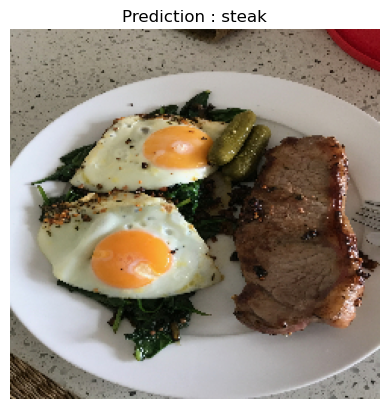

In [118]:
pred_and_plot(model_6,"03-steak.jpeg")

In [119]:
#027 Multi-class CNN's part 1 Becoming one with the data
#Multi Class image classification
import os
for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data\test'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\steak'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\sushi'.
There are 

In [120]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [121]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (509, 512, 3)


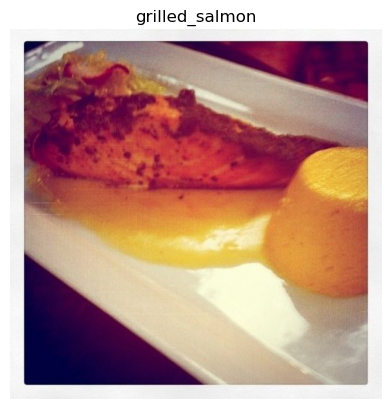

In [122]:
import random
img = view_random_image(target_dir=train_dir,target_class=random.choice(class_names))

In [123]:
#028 Multi-class CNN's part 2 Preparing our data (turning it into tensors)
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=32,class_mode="categorical")
test_data = test_datagen.flow_from_directory(test_dir,target_size=(224,224),batch_size=32,class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [124]:
#029 Multi-class CNN's part 3 Building a multi-class CNN model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Activation

model_8 = Sequential([
    Conv2D(10,3,input_shape=(224,224,3)),
    Activation(activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax"), # Sigmoid best for 2 categories but softmax best for 10 categories
])

model_8.compile(loss="categorical_crossentropy",
                optimizer=keras.optimizers.Adam(),
                metrics=['accuracy'])



In [125]:
#030 Multi-class CNN's part 4 Fitting a multi-class CNN model to the data
history_8 = model_8.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data
                                                                                                                           ))

Epoch 1/5
235/235 [==============================] - 34s 141ms/step - loss: 2.1652 - accuracy: 0.2060 - val_loss: 1.9516 - val_accuracy: 0.2996
Epoch 2/5
235/235 [==============================] - 31s 133ms/step - loss: 1.8873 - accuracy: 0.3424 - val_loss: 1.8615 - val_accuracy: 0.3584
Epoch 3/5
235/235 [==============================] - 33s 140ms/step - loss: 1.5738 - accuracy: 0.4701 - val_loss: 1.8966 - val_accuracy: 0.3420
Epoch 4/5
235/235 [==============================] - 33s 140ms/step - loss: 1.0437 - accuracy: 0.6572 - val_loss: 2.2945 - val_accuracy: 0.3048
Epoch 5/5
235/235 [==============================] - 33s 140ms/step - loss: 0.4846 - accuracy: 0.8519 - val_loss: 2.9461 - val_accuracy: 0.3048


In [126]:
#031 Multi-class CNN's part 5 Evaluating our multi-class CNN model
model_8.evaluate(test_data)

79/79 [==============================] - 8s 104ms/step - loss: 2.9461 - accuracy: 0.3048


[2.946071147918701, 0.30480000376701355]

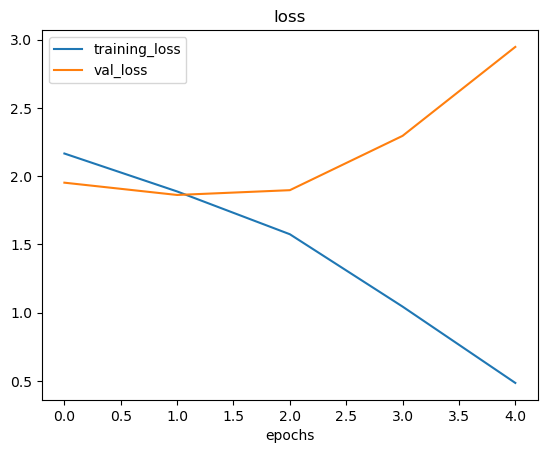

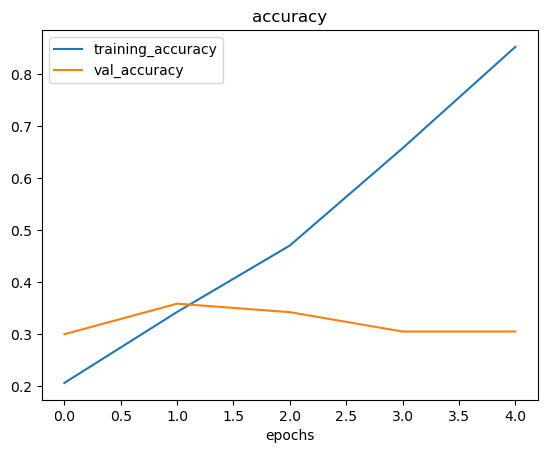

In [127]:
#Loss curves
plot_loss_curves(history_8)

In [131]:
 #Seems our model is overfitting , its better on training data
#032 Multi-class CNN's part 6 Trying to fix overfitting by removing layers
#lets try to remove 2 conv layers form the model
model_9 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax"), # Sigmoid best for 2 categories but softmax best for 10 categories
])
model_9.compile(loss="categorical_crossentropy",
                optimizer=keras.optimizers.Adam(),
                metrics=['accuracy'])

In [132]:
model_9.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 29160)             0         
                                                                 
 dense_26 (Dense)            (None, 10)              

In [133]:
history_9 = model_9.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data
                                                                                                                           ))

Epoch 1/5
235/235 [==============================] - 31s 130ms/step - loss: 2.1939 - accuracy: 0.2189 - val_loss: 2.1309 - val_accuracy: 0.2232
Epoch 2/5
235/235 [==============================] - 31s 133ms/step - loss: 1.8858 - accuracy: 0.3609 - val_loss: 1.9528 - val_accuracy: 0.3264
Epoch 3/5
235/235 [==============================] - 31s 133ms/step - loss: 1.4909 - accuracy: 0.5103 - val_loss: 2.0065 - val_accuracy: 0.3144
Epoch 4/5
235/235 [==============================] - 30s 129ms/step - loss: 0.9338 - accuracy: 0.7131 - val_loss: 2.3553 - val_accuracy: 0.3068
Epoch 5/5
235/235 [==============================] - 30s 127ms/step - loss: 0.4986 - accuracy: 0.8585 - val_loss: 2.8728 - val_accuracy: 0.2780


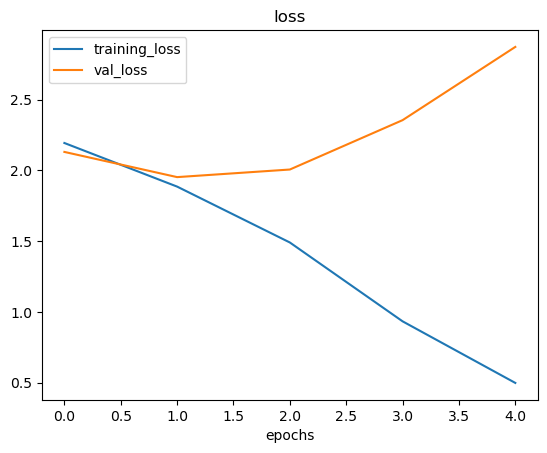

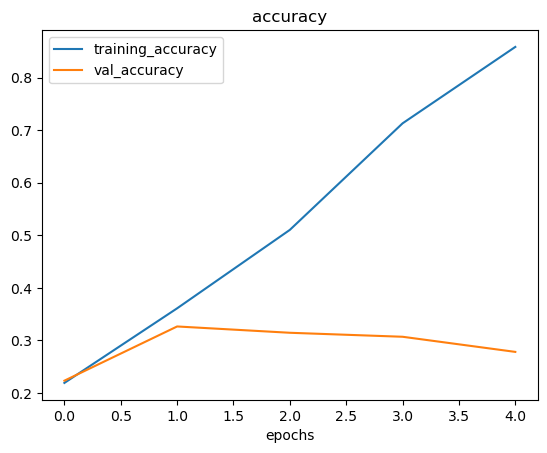

In [134]:
plot_loss_curves(history_9)

In [138]:
# trying data augmentation
#033 Multi-class CNN's part 7 Trying to fix overfitting with data augmentation
# create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,target_size=(224,224),batch_size=32,class_mode="categorical")


Found 7500 images belonging to 10 classes.


In [139]:
model_10 = tf.keras.models.clone_model(model_8)
model_10.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
model_10.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_1 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_33 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_35 (Conv2D)          (None, 106, 106, 10)      910       
                                                     

In [140]:
history_10 = model_10.fit(train_data_augmented,epochs=5,steps_per_epoch=len(train_data_augmented),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 82s 343ms/step - loss: 2.2139 - accuracy: 0.1767 - val_loss: 2.0682 - val_accuracy: 0.2344
Epoch 2/5
235/235 [==============================] - 81s 344ms/step - loss: 2.0907 - accuracy: 0.2608 - val_loss: 1.9014 - val_accuracy: 0.3288
Epoch 3/5
235/235 [==============================] - 80s 340ms/step - loss: 2.0035 - accuracy: 0.2979 - val_loss: 1.9411 - val_accuracy: 0.3388
Epoch 4/5
235/235 [==============================] - 85s 361ms/step - loss: 1.9437 - accuracy: 0.3296 - val_loss: 1.8134 - val_accuracy: 0.3796
Epoch 5/5
235/235 [==============================] - 81s 345ms/step - loss: 1.8924 - accuracy: 0.3533 - val_loss: 1.7192 - val_accuracy: 0.4284


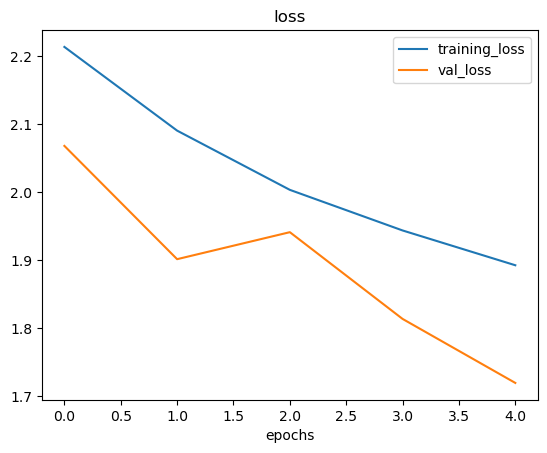

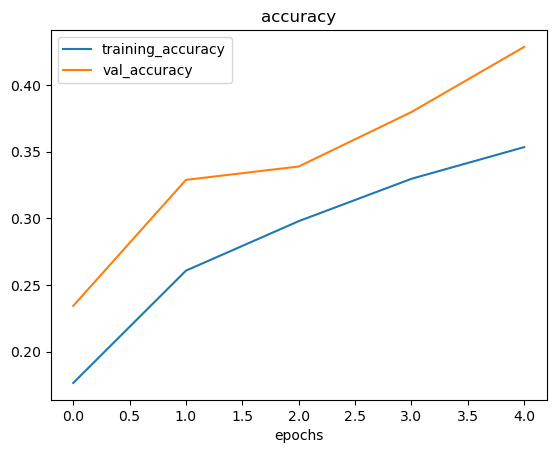

In [141]:
plot_loss_curves(history_10)

In [142]:
model_10.evaluate(test_data)

79/79 [==============================] - 7s 88ms/step - loss: 1.7192 - accuracy: 0.4284


[1.719159722328186, 0.4284000098705292]

In [143]:
#034 Multi-class CNN's part 8 Things you could do to improve your CNN model
#try transfer learning
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [148]:
def load_and_prep_image(filename,img_shape=224):
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img)
    img = tf.image.resize(img,size=[img_shape,img_shape])
    img = img/255
    return img


def pred_and_plot(model,filename, class_name = class_names):
    img = load_and_prep_image(filename)
    pred = model.predict(tf.expand_dims(img,axis=0),verbose=0)
    if len(pred[0]) > 1:
        pred_class = class_names[tf.argmax(pred[0])]
    else:
        pred_class = class_names[int(tf.round(pred))]
    plt.imshow(img)
    plt.title(f"Prediction : {pred_class}")
    plt.axis(False)

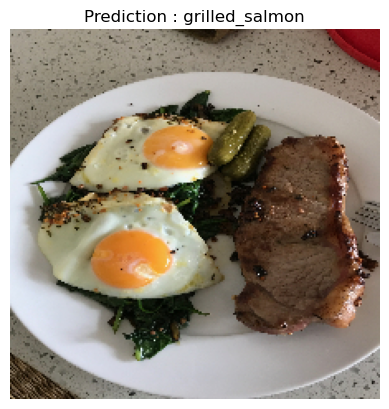

In [149]:
#035 Multi-class CNN's part 9 Making predictions with our model on custom images
pred_and_plot(model_10,filename='03-steak.jpeg',class_name=class_names)

In [151]:
#036 Saving and loading our trained CNN model
model_10.save("saved_trained_model_10")

INFO:tensorflow:Assets written to: saved_trained_model_10\assets


INFO:tensorflow:Assets written to: saved_trained_model_10\assets


In [152]:
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")